# Final Project

In [1]:
import pandas as pd
import numpy as np

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'subscribed'],
      dtype='object')

In [4]:
test.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome'],
      dtype='object')

subscribed is the target variable

In [5]:
train.shape,test.shape

((31647, 18), (13564, 17))

In [8]:
train.dtypes

ID             int64
age            int64
job           object
marital       object
education     object
default       object
balance        int64
housing       object
loan          object
contact       object
day            int64
month         object
duration       int64
campaign       int64
pdays          int64
previous       int64
poutcome      object
subscribed    object
dtype: object

target variable is categorical

In [7]:
train.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no


# Univariate Analysis

In [10]:
train['subscribed'].value_counts()

no     27932
yes     3715
Name: subscribed, dtype: int64

In [11]:
train['subscribed'].value_counts()/len(train['subscribed'])

no     0.882611
yes    0.117389
Name: subscribed, dtype: float64

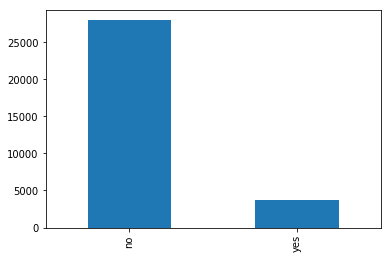

In [15]:
train['subscribed'].value_counts().plot.bar()

So.only 3715 people subscribe out of 31647

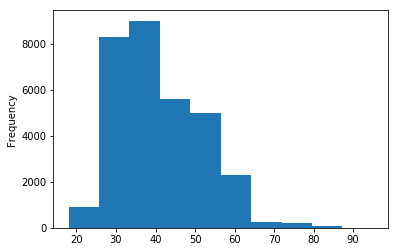

In [19]:
train['age'].plot.hist()

So,max clients are between 20-50 age group

In [22]:
train['marital'].value_counts()

married     19095
single       8922
divorced     3630
Name: marital, dtype: int64

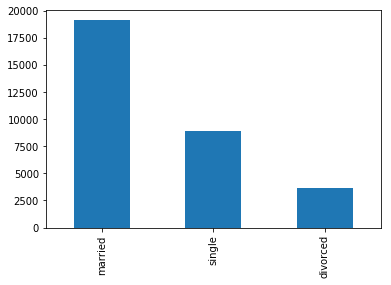

In [23]:
train['marital'].value_counts().plot.bar()

Maximum people considered are of married category

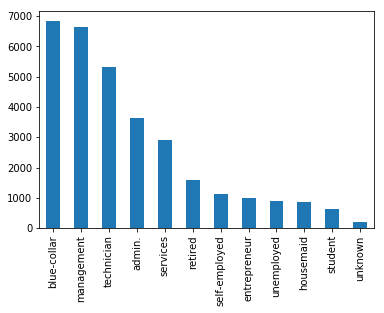

In [24]:
train['job'].value_counts().plot.bar()

Most clients are of blue collar job

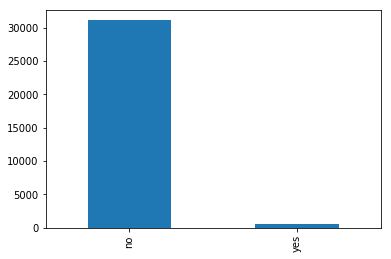

In [25]:
train['default'].value_counts().plot.bar()

most clients have no default

# Bivariate Analysis

In [29]:
train.groupby('subscribed')['age'].mean()

subscribed
no     40.862165
yes    41.672140
Name: age, dtype: float64

In [30]:
pd.crosstab(train['job'],train['subscribed'])

subscribed,no,yes
job,,
admin.,3179,452
blue-collar,6353,489
entrepreneur,923,85
housemaid,795,79
management,5716,923
retired,1212,362
self-employed,983,140
services,2649,254
student,453,182


In [31]:
pd.crosstab(train['contact'],train['subscribed'])

subscribed,no,yes
contact,,
cellular,17352,3071
telephone,1779,268
unknown,8801,376


In [33]:
train['subscribed'].replace('no', 0,inplace=True)
train['subscribed'].replace('yes', 1,inplace=True)

In [34]:
train.corr()

,ID,age,balance,day,duration,campaign,pdays,previous,subscribed
ID,1.000000,0.013337,0.067897,-0.063399,0.007183,-0.103508,0.436148,0.254476,0.296663
age,0.013337,1.000000,0.103245,-0.011056,-0.003870,0.005733,-0.021947,0.005761,0.024538
balance,0.067897,0.103245,1.000000,0.003461,0.024274,-0.012032,0.001789,0.013843,0.050807
day,-0.063399,-0.011056,0.003461,1.000000,-0.032288,0.159168,-0.087626,-0.048752,-0.029600
duration,0.007183,-0.003870,0.024274,-0.032288,1.000000,-0.080305,0.000529,0.001783,0.389838
campaign,-0.103508,0.005733,-0.012032,0.159168,-0.080305,1.000000,-0.087570,-0.033151,-0.070607
pdays,0.436148,-0.021947,0.001789,-0.087626,0.000529,-0.087570,1.000000,0.428938,0.108290
previous,0.254476,0.005761,0.013843,-0.048752,0.001783,-0.033151,0.428938,1.000000,0.088081
subscribed,0.296663,0.024538,0.050807,-0.029600,0.389838,-0.070607,0.108290,0.088081,1.000000


Duration of the call is somewhat related to subscribed,so as duration increases client is more probable to subscibe

In [35]:
train.isnull().sum()

ID            0
age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

In [36]:
test.isnull().sum()

ID           0
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
dtype: int64

So,there are no missing values in train and test dataset

# Model Building

In [37]:
target = train['subscribed']
train = train.drop('subscribed',1)

In [68]:
train = pd.get_dummies(train)

Dividing the train dataset

In [43]:
x_train=train[0:25999]
x_val=train[26000:]

In [44]:
y_train=target[0:25999]
y_val=target[26000:]

# Logistic Regression

In [45]:
from sklearn.linear_model import LogisticRegression

In [46]:
lreg = LogisticRegression()

In [48]:
lreg.fit(x_train,y_train)

G:\aNAA\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [50]:
prediction = lreg.predict(x_val)

In [51]:
from sklearn.metrics import accuracy_score

In [52]:
accuracy_score(y_val, prediction)

0.8939259783956083

We can inprove the score using decision tree

# Decision Tree

In [53]:
from sklearn.tree import DecisionTreeClassifier

In [57]:
det=DecisionTreeClassifier(max_depth=4)

In [58]:
det.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [59]:
predict = det.predict(x_val)

In [60]:
accuracy_score(y_val, predict)

0.907030281565433

So,now there is more than 90% accuracy

In [61]:
test = pd.get_dummies(test)

In [62]:
final_prediction=det.predict(test)

Making a csv file

In [65]:
submission = pd.DataFrame()
submission['subscribed'] = final_prediction

In [66]:
submission['subscribed'].replace(0,'no',inplace=True)
submission['subscribed'].replace(1,'yes',inplace=True)

In [67]:
submission.to_csv('submission.csv')